## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create espresso instances

In [2]:
git_repo_folder='/Users/josesho/bin/git-repos/espresso'

datadir1=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/22')
datadir2=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/29')
datadir3=os.path.join(git_repo_folder,'data/starvation_gradient/0-Hrs')
datadir4=os.path.join(git_repo_folder,'data/starvation_gradient/24-Hrs')
datadir5=os.path.join(git_repo_folder,'data/starvation_gradient/48-Hrs')

twotubes22=esp.espresso(folder=datadir1)
twotubes29=esp.espresso(folder=datadir2)

starvation0=esp.espresso(folder=datadir3)
starvation0.add_label(label_name='starved_time',label_value='0-Hrs')

starvation24=esp.espresso(folder=datadir4)
starvation24.add_label(label_name='starved_time',label_value='24-Hrs')

starvation48=esp.espresso(folder=datadir5)
starvation48.add_label(label_name='starved_time',label_value='48-Hrs')


starved_time has been added as a new label, with '0-Hrs' as the custom value.
starved_time has been added as a new label, with '24-Hrs' as the custom value.
starved_time has been added as a new label, with '48-Hrs' as the custom value.


In [3]:
starved=starvation0+starvation24+starvation48

## Plotting

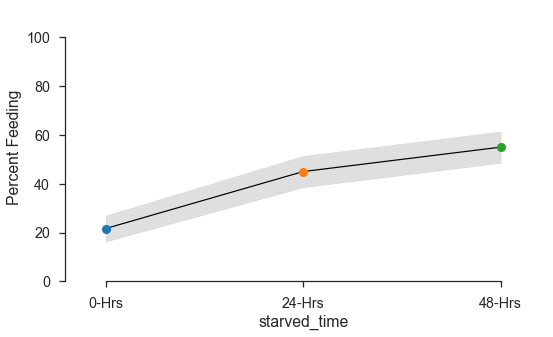

In [4]:
f,s=starved.plot.percent_feeding(group_by='starved_time',
                                    palette_type='categorical',time_end=60)

f.tight_layout()

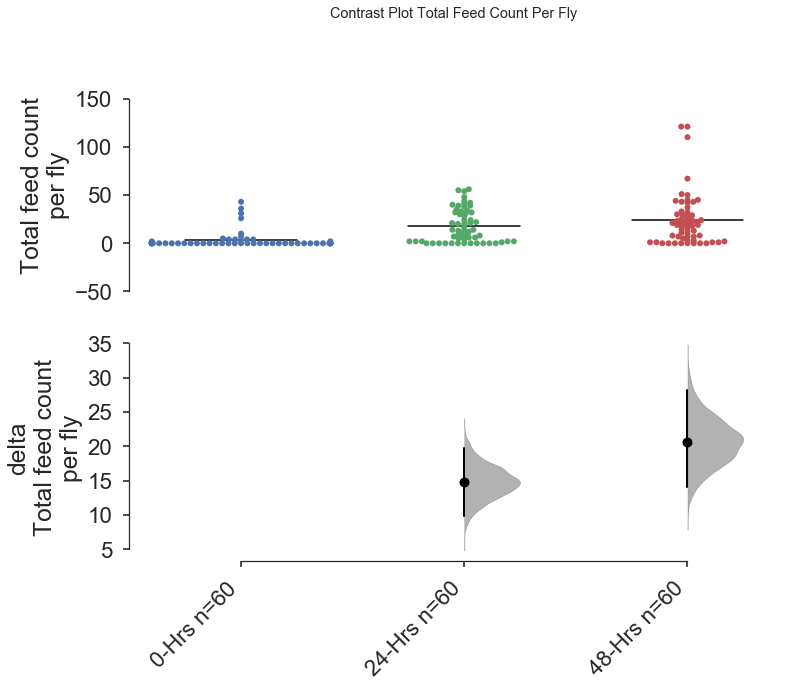

In [5]:
f,summ=starved.plot.feed_count_per_fly(group_by='starved_time',
                                      contrastplot_kwargs={'show_means':'bars'})

plotting 0-Hrs rasters
plotting 0-Hrs
plotting 24-Hrs rasters
plotting 24-Hrs
plotting 48-Hrs rasters
plotting 48-Hrs


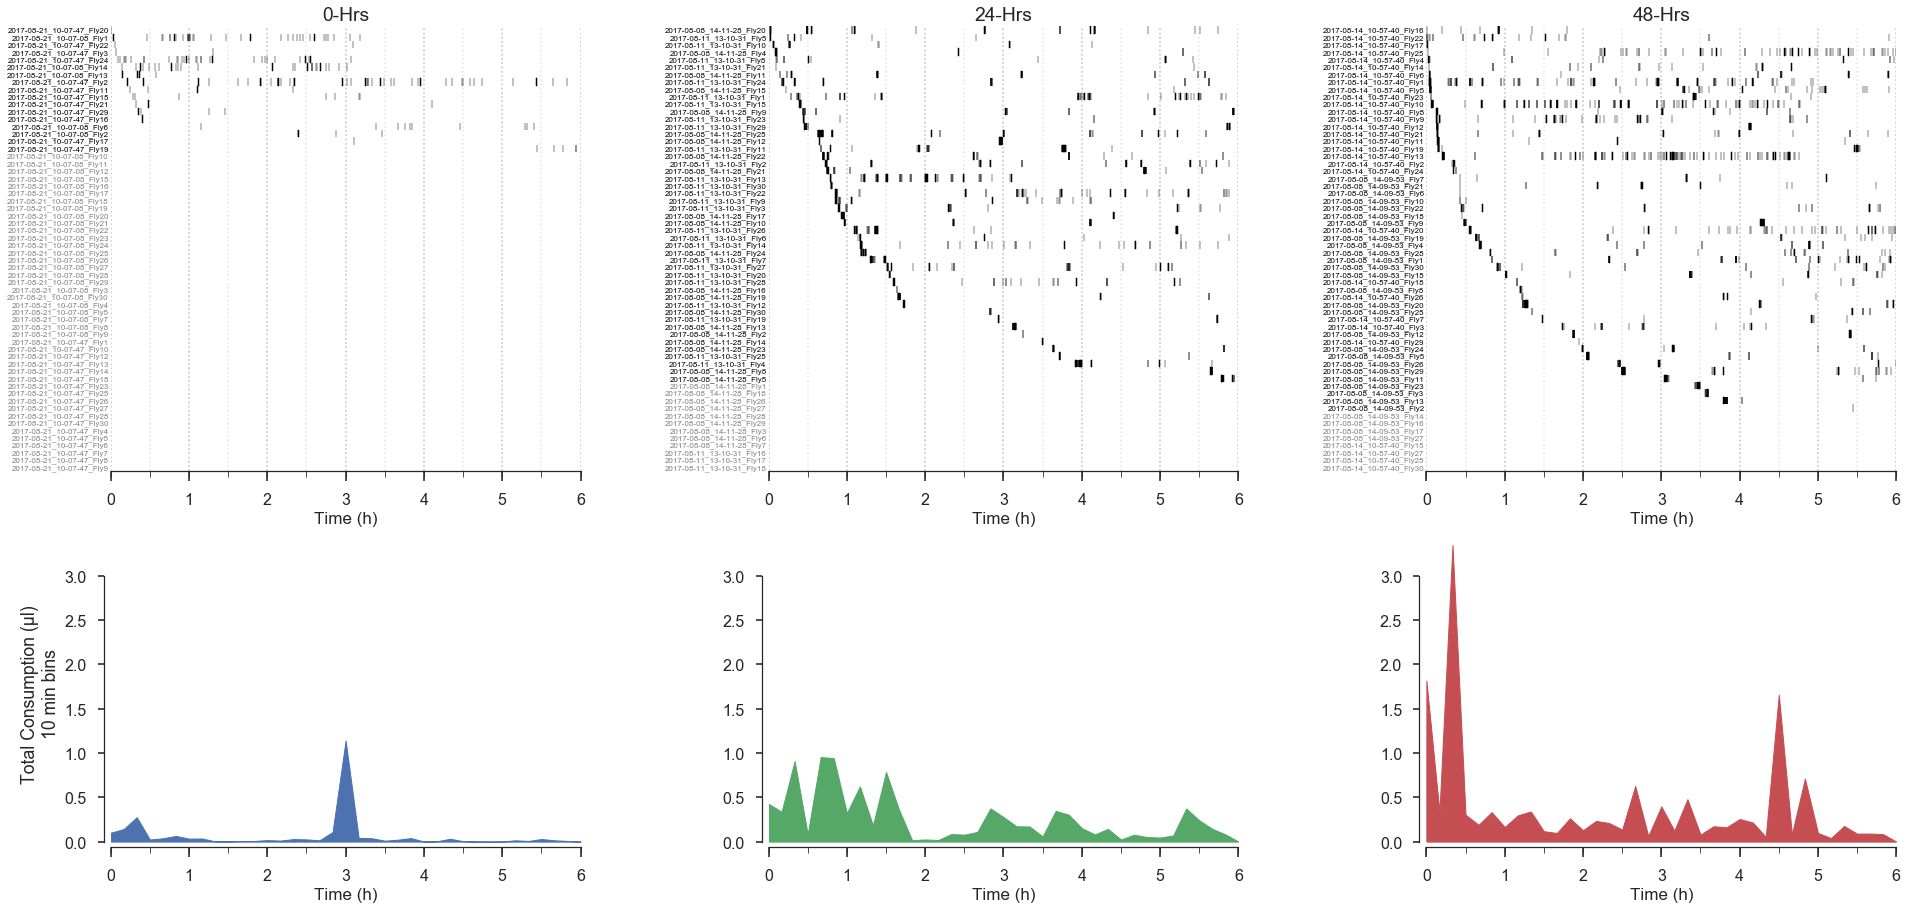

In [6]:
f=starved.plot.rasters(group_by='starved_time')